# Osmos Academy: Predicting with Data!
Presented by Zafarali Ahmed (http://zafarali.me) and Pierre Thodoroff


In [48]:
# import the libraries that we will use!

# numpy is the standard scientific library for manipulating arrays
# more information at http://www.numpy.org/ 
import numpy as np 

# sklearn is a machine learning library with most of the
# common algorithms implemented
# more information at scikit-learn.org/
from sklearn.linear_model import LinearRegression # the learning algorithm itself
from sklearn.cross_validation import train_test_split # data splitter
from sklearn.preprocessing import PolynomialFeatures # for more complicated examples later
from sklearn.metrics import mean_squared_error # to test our model

# Linear Regression

## First dataset: Boston Housing Prices

In [49]:
import sklearn.datasets as datasets 
boston = datasets.load_boston()
# print the description:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Train-test split

In [57]:
# we need a way to train as well as evaluate the model, we can use the inbuilt method
# in sckit learn which splits our dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, train_size=0.8)

### Training the Model

In [58]:
lr_model = LinearRegression() # creates the model
lr_model.fit(X_train, Y_train) # trains the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Testing the model: How well did we do?

In [62]:
# mean squared error
Y_predicted = lr_model.predict(X_test) # what does our model predict?
mean_squared_error(Y_predicted,Y_test)

14.85307213505817

This means our prices are wrong by about 5.5 thousand dollars

In [63]:
# score
lr_model.score(X_test, Y_test)

0.74796126141308839

This is a score specific to the linear regression model, the closer to 1 it is the better your model fits the data

## Feature transformations

## Second dataset: Simple House Prices

In [71]:
X = np.load('./number_rooms.npy')
Y = np.load('./house_prices.npy')

Here our data is just one feature, number of rooms, so we can plot it.

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


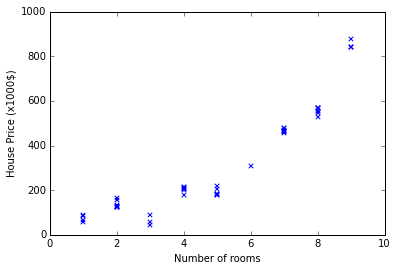

In [73]:
plt.scatter(X,Y, marker='x')
plt.xlabel('Number of rooms')
plt.ylabel('House Price (x1000$)')

Looks pretty linear, let's try to play around with some fits!

In [115]:
def fit_polynomial(X_t, Y_t, degree=1):
    """
        This function let's you explore the effects of changing the degree on the 
        performance of your linear regression
    """
    
    # reshape our arrays as required
    Y_reshaped = Y_t.reshape(-1,1)
    X_reshaped = X_t.reshape(-1,1)
    
    # split the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y_reshaped, train_size=0.8)

        
    # create a feature transformer
    feature_transformer = PolynomialFeatures(degree=degree)
    
    # transform the features
    X_transformed = feature_transformer.fit_transform(X_train)
    
    # train the model
    poly_lr = LinearRegression()
    poly_lr.fit(X_transformed, Y_train)
    
    
    # plotting
    plt.figure('polyfit')
    plt.scatter(X_transformed[:,1], Y_train, marker='x')
    line_points = feature_transformer.transform(np.linspace(0,10,num=150).reshape(-1,1))
    plt.plot(line_points[:,1], poly_lr.predict(line_points), 'r')
    plt.ylim([0,1000])
    plt.xlabel('Number of rooms')
    plt.ylabel('Cost of the house')
    plt.title('Regression fit with degree'+str(degree))
    plt.show()
    
    # scoring
    X_test_transformed = feature_transformer.transform(X_test)
    Y_predicted = poly_lr.predict(X_test_transformed)
    print 'The error of the model is:', mean_squared_error(Y_test, Y_predicted)
    


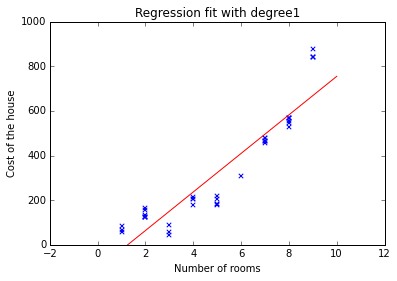

The error of the model is: 6225.83816958


In [116]:
fit_polynomial(X, Y, degree=1)